<a href="https://colab.research.google.com/github/farihahahaa/farihahahaa/blob/main/Climate_and_Health_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import Counter, defaultdict
from itertools import combinations
import pandas as pd
import numpy as np
import operator
import math
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt
from sklearn import metrics


# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
#https://www.datacamp.com/tutorial/understanding-logistic-regression-python
from sklearn.ensemble import RandomForestClassifier
#https://www.datacamp.com/tutorial/random-forests-classifier-python
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


from google.colab import drive

#Emergency department visits due to heat, Both sexes, All Ages, All Races/Ethnicities, Age-adjusted rate per 100,000, 2018
drive.mount("/content/drive", force_remount=True)
filepath_hri = "/content/drive/MyDrive/Climformatics/hri.csv"
hri = pd.read_csv(filepath_hri)

# drive.mount("/content/drive", force_remount=True)
# filepath_ac = "/content/drive/MyDrive/Climformatics/ac_data.csv"
# ac = pd.read_csv(filepath_ac)

drive.mount("/content/drive", force_remount=True)
filepath_age = "/content/drive/MyDrive/Climformatics/age.csv"
age = pd.read_csv(filepath_age)

drive.mount("/content/drive", force_remount=True)
filepath_age_adj = "/content/drive/MyDrive/Climformatics/age_adj.csv"
age_adj = pd.read_csv(filepath_age_adj)

drive.mount("/content/drive", force_remount=True)
filepath_gender = "/content/drive/MyDrive/Climformatics/gender.csv"
gender = pd.read_csv(filepath_gender, index_col=0)

drive.mount("/content/drive", force_remount=True)
filepath_re = "/content/drive/MyDrive/Climformatics/race_ethnicity.csv"
re = pd.read_csv(filepath_re, index_col=0)

drive.mount("/content/drive", force_remount=True)
filepath_map = "/content/drive/MyDrive/Climformatics/hri_map.csv"
map = pd.read_csv(filepath_map, index_col=0)

drive.mount("/content/drive", force_remount=True)
filepath_del = "/content/drive/MyDrive/Climformatics/delaware.csv"
delaware = pd.read_csv(filepath_del, index_col=0)

drive.mount("/content/drive", force_remount=True)
filepath_new = "/content/drive/MyDrive/Climformatics/ageadjdata2000_2021.csv"
upto2021 = pd.read_csv(filepath_new, index_col=0)

#weekly emergency visits 2018-2023 data
drive.mount("/content/drive", force_remount=True)
filepath_weekly = "/content/drive/MyDrive/Climformatics/weekly.csv"
weekly = pd.read_csv(filepath_weekly, index_col=0)

#weekly temp 2018-2023 data
drive.mount("/content/drive", force_remount=True)
filepath_weekly_temp = "/content/drive/MyDrive/Climformatics/weekly_temp.csv"
weekly_temp = pd.read_csv(filepath_weekly_temp, index_col=0)

#weekly temp 2018-2023 data CA
drive.mount("/content/drive", force_remount=True)
filepath_weekly_temp_ca = "/content/drive/MyDrive/Climformatics/weekly_temp_ca.csv"
weekly_temp_ca = pd.read_csv(filepath_weekly_temp_ca, index_col=0)

#alameda
drive.mount("/content/drive", force_remount=True)
filepath_alameda = "/content/drive/MyDrive/Climformatics/alameda.csv"
alameda = pd.read_csv(filepath_alameda, index_col=0)

drive.mount("/content/drive", force_remount=True)
filepath_alameda2 = "/content/drive/MyDrive/Climformatics/alameda2.csv"
alameda2 = pd.read_csv(filepath_alameda2, index_col=0)

#daily 2017-2023
# drive.mount("/content/drive", force_remount=True)
# filepath_daily = "/content/drive/MyDrive/Climformatics/daily.csv"
# daily = pd.read_csv(filepath_daily, index_col=0)

Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive
Mounted at /content/drive


In [ ]:
alameda2.head()

,census_county,census_city,heat_health_action_index,perc_children,perc_no_hs_diploma,perc_elderly,perc_outdoor_workers,tract_population,perc_poverty,perc_two_races,...,perc_low_birth_weight,cardio_disease_prevalence,perc_ambulatory_disability,perc_cognitive_disability,pm25_concentration,perc_impervious_surfaces,change_in_dev,perc_no_tree_canopy,uhii_avgdeltat,ozone_exceedance
census_tract,,,,,,,,,,,,,,,,,,,,,
6001400100,Alameda County,Berkeley,3.52,6.1,1.7,23.0,1.84,2952,3.5,4.1,...,2.99,3.01,3.6,3.1,7.80,16.90,66.12,63.57,1.38,0.0
6001400200,Alameda County,Berkeley,23.41,3.8,1.5,22.2,3.19,1984,5.8,8.3,...,1.24,3.98,6.0,1.7,7.78,50.38,0.00,80.29,0.79,0.0
6001400300,Alameda County,Oakland,35.01,5.8,5.0,13.8,0.92,5377,8.1,4.4,...,4.13,4.42,4.5,2.2,7.77,64.36,0.00,94.16,0.71,0.0
6001400400,Alameda County,Oakland,36.44,6.3,6.1,12.7,1.11,4105,7.4,5.9,...,3.98,4.89,5.5,7.3,7.76,55.78,0.00,88.62,0.60,0.0
6001400500,Alameda County,Oakland,51.07,6.3,3.2,9.7,6.39,3651,12.7,3.7,...,5.59,7.55,6.3,3.2,7.75,66.17,0.00,94.37,0.45,0.0


In [ ]:
alameda.head()

,census_tract,time_of_year,socioeconomic_group,census_county,census_city,avg_event_rh_max_perc,avg_event_rh_min_perc,tmax,tmin,hist_avg_annual_events,hist_avg_duration
geoid_long,,,,,,,,,,,
1400000US06001400100,6001400100,Total,2006 HW,Alameda County,Berkeley,68.62,44.04,93.69,66.49,0.00,0.00
1400000US06001400100,6001400100,Total,Vulnerable,Alameda County,Berkeley,0.00,0.00,0.00,0.00,0.00,0.00
1400000US06001400100,6001400100,AM,General,Alameda County,Berkeley,60.10,21.64,86.76,57.44,0.07,4.00
1400000US06001400100,6001400100,JJA,General,Alameda County,Berkeley,93.86,55.08,79.16,59.64,0.37,5.45
1400000US06001400100,6001400100,SO,General,Alameda County,Berkeley,60.18,23.64,90.49,60.82,1.13,2.82


Imports and all files ^
Looking at files below

In [ ]:
weekly_temp_ca.head()
weekly_temp.head()

weekly_temp1 = weekly_temp[weekly_temp['State'].isin(['California', 'Arizona', 'Hawaii', 'Nevada'])]
weekly_temp_grouped = weekly_temp1.groupby(['Start Date', 'End Date'])['Value'].aggregate(['mean'])
weekly_temp_grouped.head()

weekly_temp2 = weekly_temp[weekly_temp['State'].isin(['California'])]
weekly_temp_grouped2 = weekly_temp2.groupby(['Start Date', 'End Date'])['Value'].aggregate(['mean'])
weekly_temp_grouped2.head()

weekly.head(5)

weekly_9 = weekly[weekly['HHS Regions'] == 'Region 9']
weekly_9.head(5)

weekly_ev_final = weekly_9[weekly_9['Start Year'].isin([2018, 2019, 2020, 2021, 2022, 2023])]

upto2021.head(5)
hospital_upto2021CA = upto2021[upto2021['State'] == 'California']
hospital_upto2021CA.head(5)

,State,CountyFIPS,County,Start Year,End Year,Start Date,End Date,Value,Data Comment,Unnamed: 10
StateFIPS,,,,,,,,,,
6,California,6001,Alameda,2018,2018,2018-03-25,2018-03-31,68.6,NaN,NaN
6,California,6001,Alameda,2018,2018,2018-04-08,2018-04-14,65.2,NaN,NaN
6,California,6001,Alameda,2018,2018,2018-08-26,2018-09-01,76.4,NaN,NaN
6,California,6001,Alameda,2018,2018,2018-11-25,2018-12-01,59.4,NaN,NaN
6,California,6001,Alameda,2018,2018,2018-05-27,2018-06-02,77.2,NaN,NaN


In [ ]:
hri['County Name'] = hri['County'].replace({6001: 'Alameda', 6045: 'Mendocino', 6083: 'Santa Barbara', 6073: 'San Diego', 6089: 'Shasta'})
#Mariposa - NA
#hri['Total'] = hri['Total'].astype(str).astype(int)
options = ['Alameda', 'Mendocino', 'Santa Barbara', 'San Diego', 'Shasta']
hri_new = hri[hri['County Name'].isin(options)]
hri_new['Total'] = hri_new['Total'].astype(str).astype(int)
hri_new.style.set_caption("Emergency department visits due to heat, Both sexes, All Ages, All Races/Ethnicities, Age-adjusted rate per 100,000, 2018")

<ipython-input-15-45afd9962780>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hri_new['Total'] = hri_new['Total'].astype(str).astype(int)


,County,"Age-adjusted rate per 100,000",Lower 95% Limit,Upper 95% Limit,Total,County Name
1,6001,5.100000,4.100000,6.300000,91,Alameda
23,6045,28.900000,18.500000,42.800000,27,Mendocino
37,6073,11.100000,10.000000,12.300000,378,San Diego
42,6083,7.300000,5.100000,10.200000,37,Santa Barbara
45,6089,41.400000,32.300000,52.200000,77,Shasta


EDA: Plot County Names and Mean Cases

---



<Axes: xlabel='County Name', ylabel='Total'>

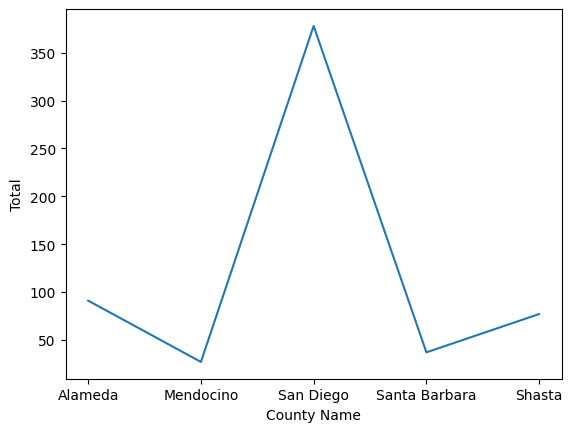

In [ ]:
sns.lineplot(data=hri_new, x="County Name", y="Total")

EDA: Plot County Names and Mean Cases Separated by Gender

<Axes: xlabel='County', ylabel='Number of cases'>

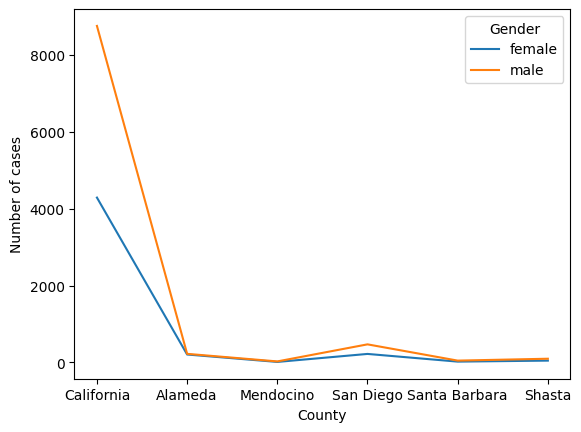

In [ ]:
sns.lineplot(data=gender, x="County", y="Number of cases", hue = "Gender")

EDA: Plot County Names and Mean Cases Separated by Age

<Axes: xlabel='County', ylabel='Number of cases'>

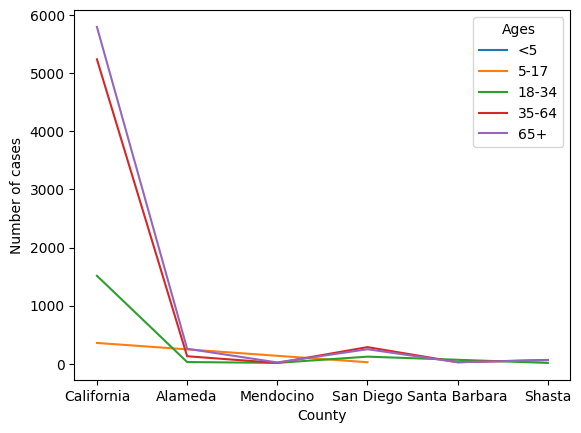

In [ ]:
sns.lineplot(data=age, x="County", y="Number of cases", hue = "Ages")

EDA: Plot County Names and Mean Cases Separated by Race

<Axes: xlabel='County', ylabel='Number of cases'>

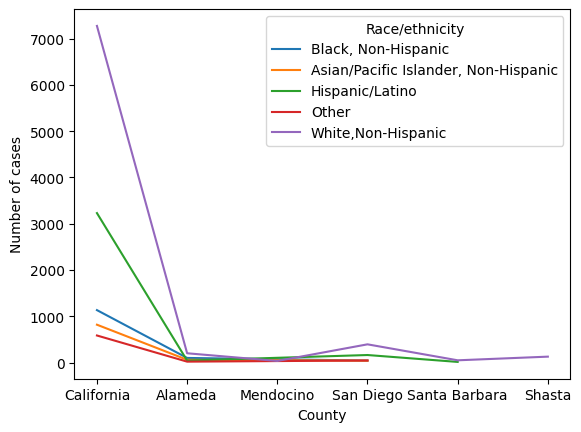

In [ ]:
sns.lineplot(data=re, x="County", y="Number of cases", hue = "Race/ethnicity")

Modeling


In [ ]:
weekly_temp_final = weekly_temp_grouped.reset_index()
#mean: Mean Weekly Avg Max Temp
weekly_temp_final = weekly_temp_final.rename(columns={"mean": "Mean"})
weekly_temp_final.head()

,Start Date,End Date,Mean
0,2018-01-07,2018-01-13,55.910000
1,2018-01-14,2018-01-20,58.780000
2,2018-01-21,2018-01-27,50.958889
3,2018-01-28,2018-02-03,64.248889
4,2018-02-04,2018-02-10,68.281111


In [ ]:
weekly_ev_final.head()
#value : number of emergency dept visits

,HHS Regions,Start Year,End Year,Start Date,End Date,Value,Data Comment,HRI HHS Regions,Unnamed: 9
RegionId,,,,,,,,,
9,Region 9,2018,2018,2018-12-02,2018-12-08,7,NaN,HRI Rate (1),NaN
9,Region 9,2018,2018,2018-12-09,2018-12-15,4,NaN,HRI Rate (1),NaN
9,Region 9,2018,2018,2018-12-16,2018-12-22,7,NaN,HRI Rate (1),NaN
9,Region 9,2018,2018,2018-12-23,2018-12-29,9,NaN,HRI Rate (1),NaN
9,Region 9,2018,2018,2018-08-12,2018-08-18,210,NaN,HRI Rate (1),NaN


In [ ]:
weekly_data1 = pd.merge(weekly_temp_final, weekly_ev_final, on=['Start Date', 'End Date'])
weekly_data1.head()

,Start Date,End Date,Mean,HHS Regions,Start Year,End Year,Value,Data Comment,HRI HHS Regions,Unnamed: 9
0,2018-01-07,2018-01-13,55.910000,Region 9,2018,2018,6,NaN,HRI Rate (1),NaN
1,2018-01-14,2018-01-20,58.780000,Region 9,2018,2018,3,NaN,HRI Rate (1),NaN
2,2018-01-21,2018-01-27,50.958889,Region 9,2018,2018,2,NaN,HRI Rate (1),NaN
3,2018-01-28,2018-02-03,64.248889,Region 9,2018,2018,9,NaN,HRI Rate (1),NaN
4,2018-02-04,2018-02-10,68.281111,Region 9,2018,2018,8,NaN,HRI Rate (1),NaN


In [ ]:
weekly_data = weekly_data1[['Start Date', 'End Date', 'Mean', 'Value']]
weekly_data.head()

,Start Date,End Date,Mean,Value
0,2018-01-07,2018-01-13,55.910000,6
1,2018-01-14,2018-01-20,58.780000,3
2,2018-01-21,2018-01-27,50.958889,2
3,2018-01-28,2018-02-03,64.248889,9
4,2018-02-04,2018-02-10,68.281111,8


In [ ]:
weekly_data['Date'] = pd.to_datetime(weekly_data['Start Date'])
date_obj = weekly_data['Date']
weekly_data["Date Float"] = pd.to_numeric(date_obj, downcast ='signed')
weekly_data['Value'] = weekly_data['Value'].str.replace(',', '')
weekly_data['Value'] = weekly_data['Value'].astype(float)

<ipython-input-29-a934ec485bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['Date'] = pd.to_datetime(weekly_data['Start Date'])
<ipython-input-29-a934ec485bdf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data["Date Float"] = pd.to_numeric(date_obj, downcast ='signed')
<ipython-input-29-a934ec485bdf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
weekly_data.dtypes

Start Date            object
End Date              object
Mean                 float64
Value                float64
Date          datetime64[ns]
Date Float             int64
dtype: object

Epoch 1/100
19/19 [==============================] - 5s 18ms/step - loss: 0.2745
Epoch 2/100
19/19 [==============================] - 0s 17ms/step - loss: 0.2137
Epoch 3/100
19/19 [==============================] - 0s 17ms/step - loss: 0.2021
Epoch 4/100
19/19 [==============================] - 0s 18ms/step - loss: 0.1902
Epoch 5/100
19/19 [==============================] - 0s 17ms/step - loss: 0.1321
Epoch 6/100
19/19 [==============================] - 0s 17ms/step - loss: 0.0229
Epoch 7/100
19/19 [==============================] - 0s 17ms/step - loss: 0.0096
Epoch 8/100
19/19 [==============================] - 0s 17ms/step - loss: 0.0067
Epoch 9/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0046
Epoch 10/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 11/100
19/19 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 12/100
19/19 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 13/100
19/19 [=====

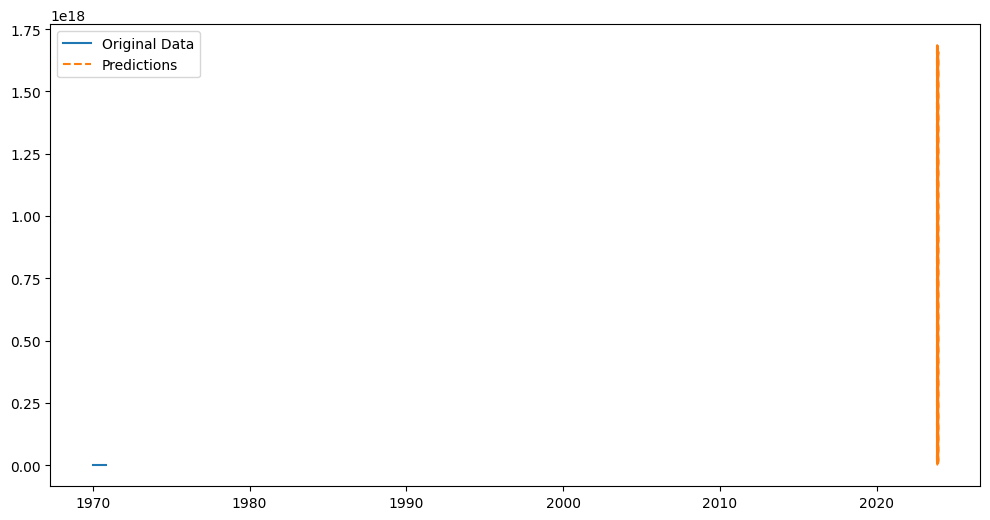

In [ ]:
from numpy import array
from pickle import dump
# from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

df = weekly_data[['Date Float', 'Value']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))

# Prepare data for LSTM model
look_back = 10  # Number of previous time steps to use as input features
X, y = [], []

for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:(i + look_back), 0])
    y.append(scaled_data[i + look_back, 0])

X, y = np.array(X), np.array(y)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32)

# Create test data
test_data = scaled_data[len(scaled_data) - look_back:]

# Reshape test data to the same format as training data
test_data = np.reshape(test_data, (1, look_back, 1))

# Make predictions
predictions = []

for i in range(30):  # Adjust the number of future predictions as needed
    predicted_value = model.predict(test_data)[0]
    #pred = model.predict(test_seq).argmax(axis = 1)[0]
    predictions.append(predicted_value)
    test_data = np.append(test_data[:, 1:, :], [[predicted_value]], axis=1)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate future dates for the predictions
future_dates = pd.date_range(start='2023-11-02', periods=len(predictions), freq='D')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(future_dates, predictions, label='Predictions', linestyle='dashed')
plt.legend()
plt.show()


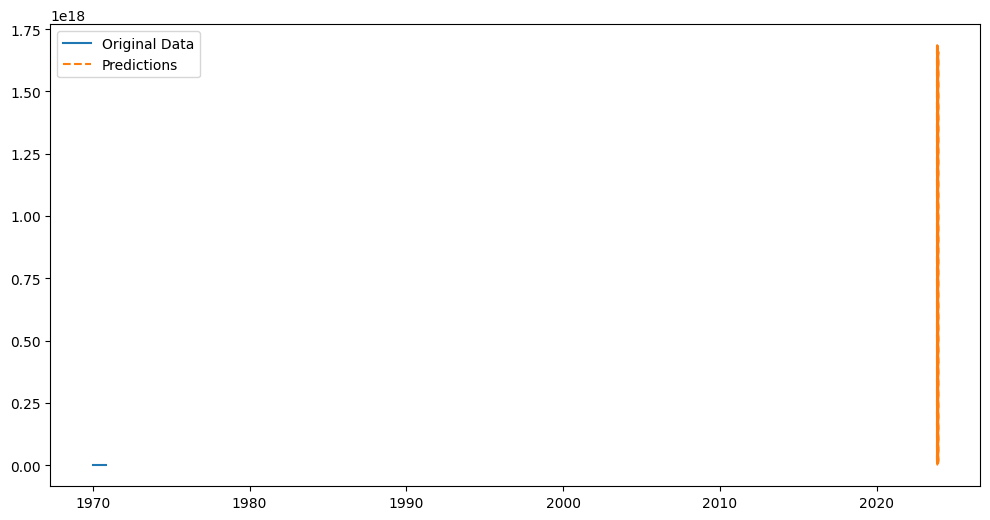

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(future_dates, predictions, label='Predictions', linestyle='dashed')
#ax.set_xlim(2020, 2040)
plt.legend()
plt.show()

In [ ]:
weekly_data.head()
weekly_data = weekly_data.rename(columns={'Mean': 'Mean Temp', 'Value': 'Hosps'})
weekly_data.head()

,Start Date,End Date,Mean Temp,Hosps,Date,Date Float
0,2018-01-07,2018-01-13,55.910000,6.0,2018-01-07,1515283200000000000
1,2018-01-14,2018-01-20,58.780000,3.0,2018-01-14,1515888000000000000
2,2018-01-21,2018-01-27,50.958889,2.0,2018-01-21,1516492800000000000
3,2018-01-28,2018-02-03,64.248889,9.0,2018-01-28,1517097600000000000
4,2018-02-04,2018-02-10,68.281111,8.0,2018-02-04,1517702400000000000


In [ ]:
time = weekly_data['Start Date']
mean_temp = weekly_data['Mean Temp']
hosp = weekly_data['Hosps']

2 Plots: Mean Temp by Dates, and Hospitalizations by Date

<ipython-input-37-f2455afb7374>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 1)
<ipython-input-37-f2455afb7374>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 2)


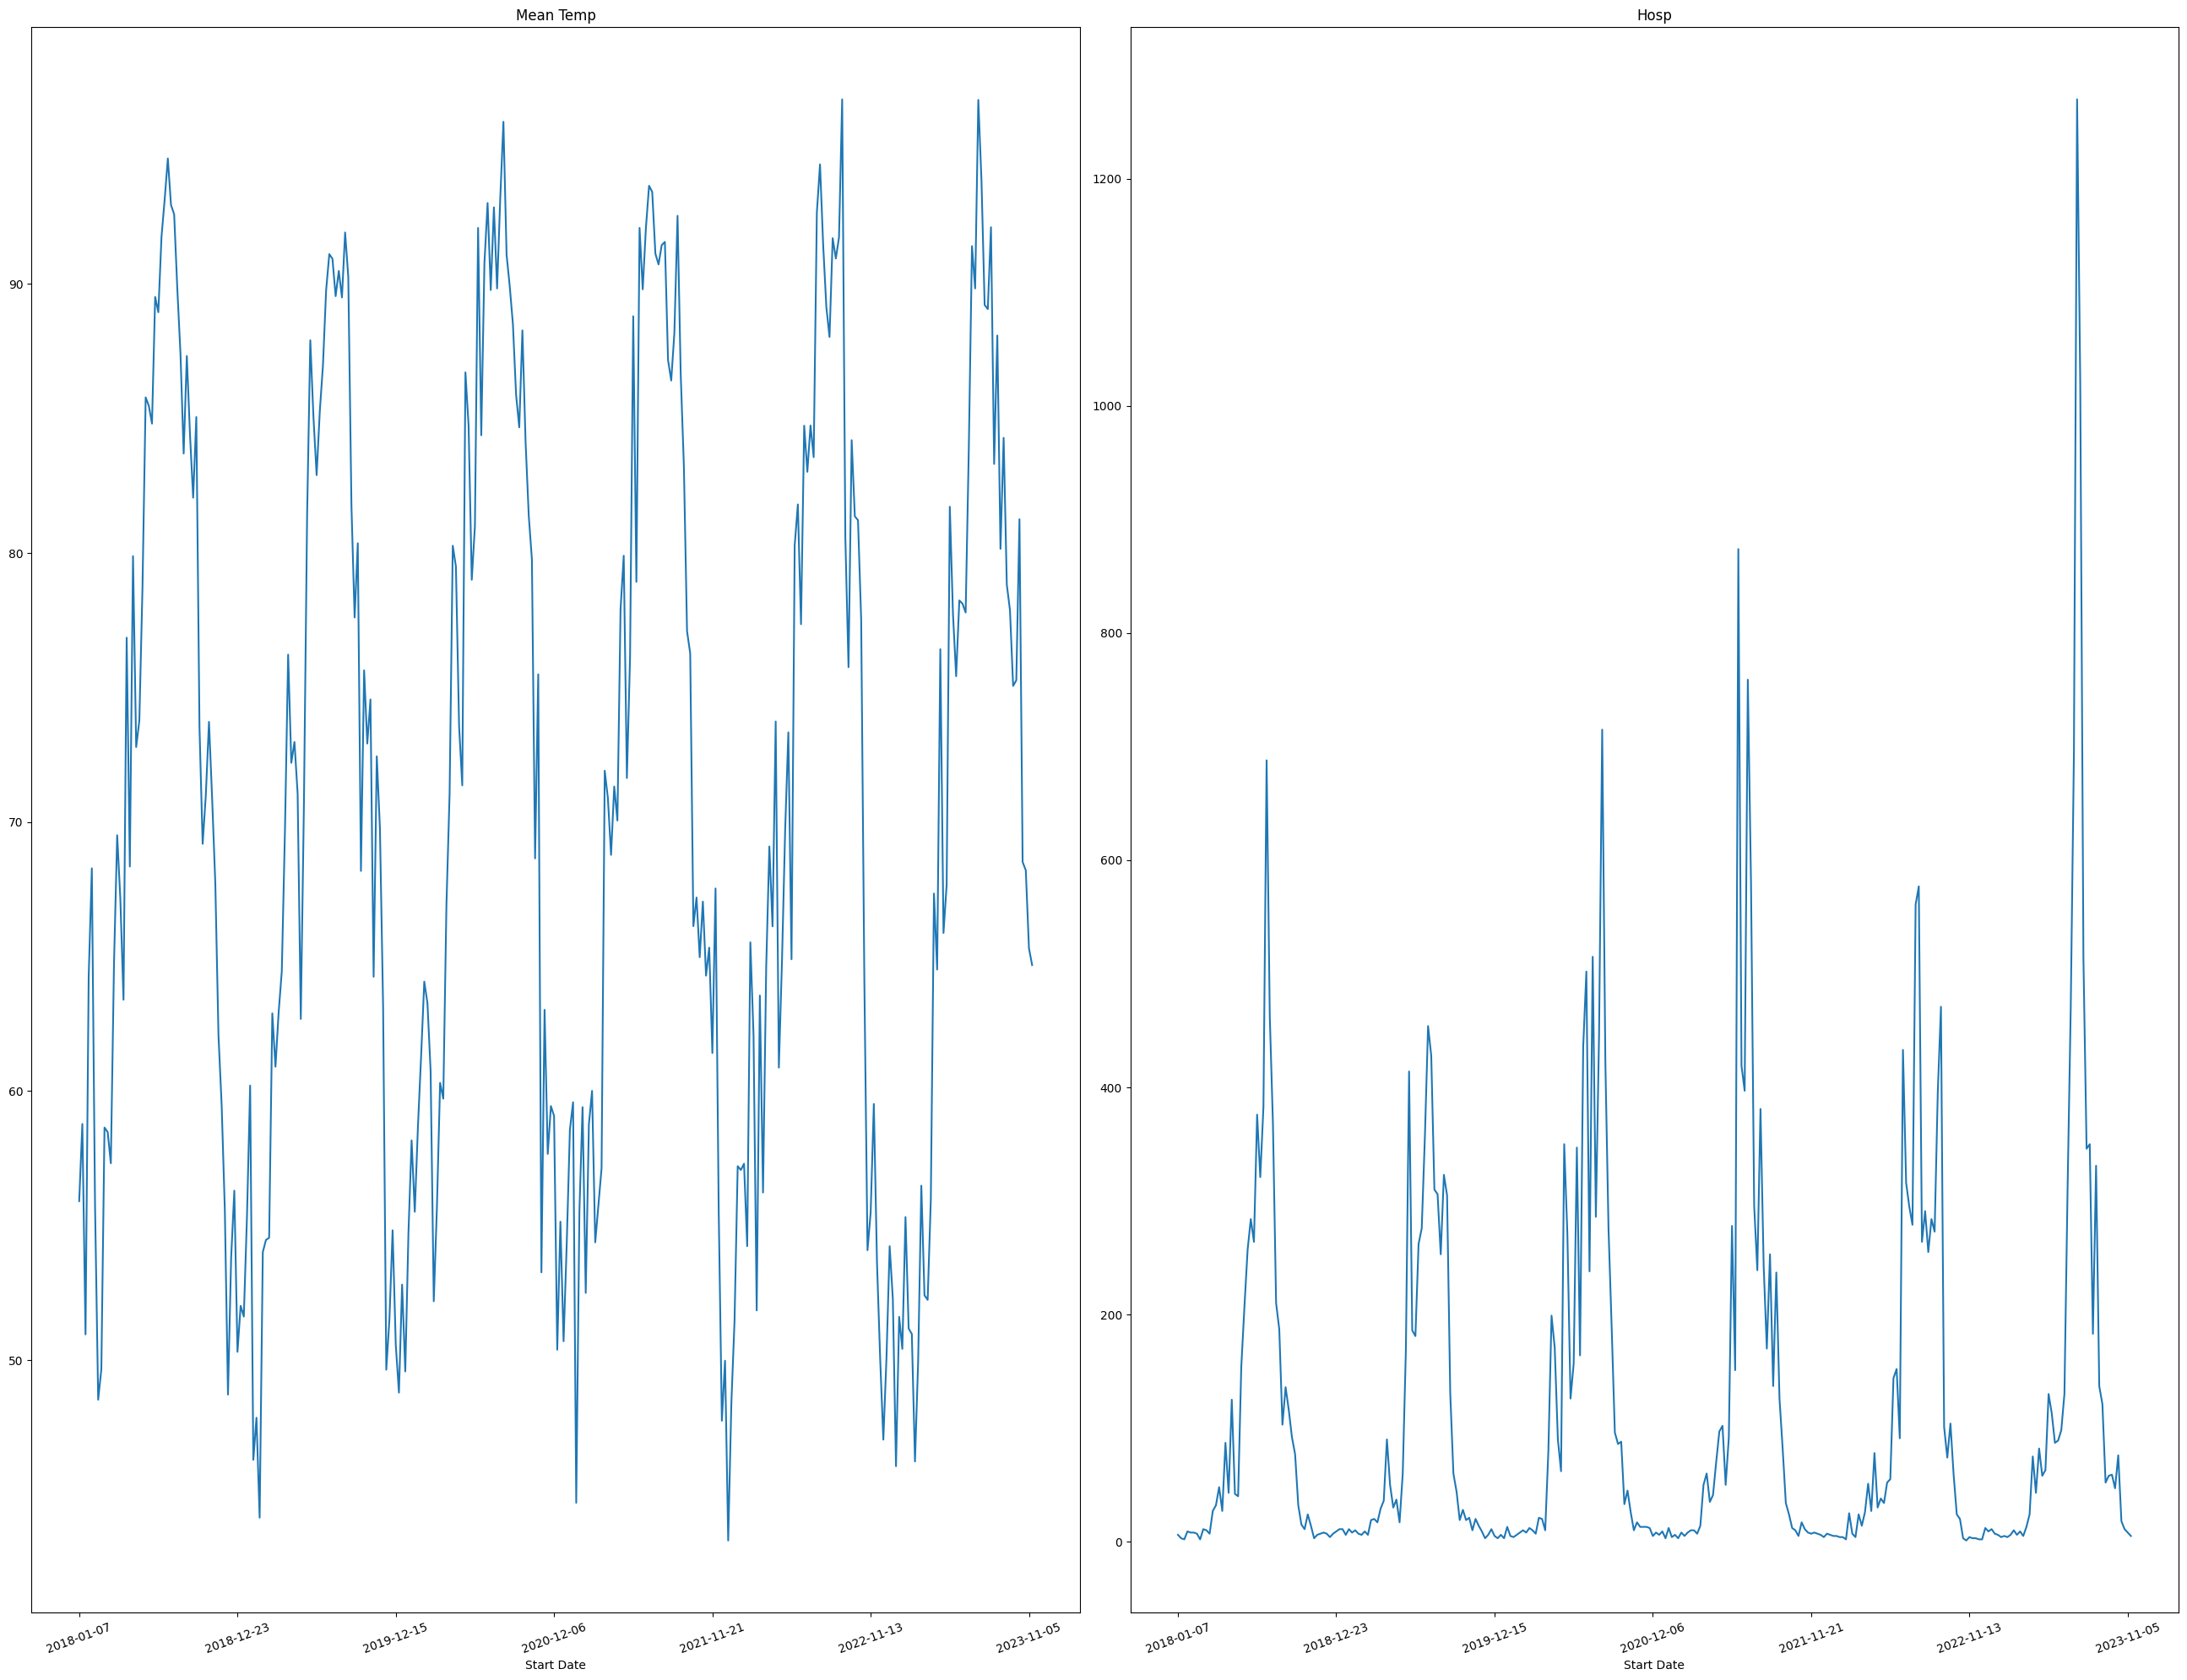

In [ ]:
from matplotlib.pyplot import figure

plt.subplots(nrows=2, ncols=3, figsize=(26, 20))

#col, row
ax = plt.subplot(1, 2, 1)
mean_temp.index = time
mean_temp.head()
mean_temp.plot(rot=20)
plt.title('Mean Temp')

ax = plt.subplot(1, 2, 2)
hosp.index = time
hosp.head()
hosp.plot(rot=20)
plt.title('Hosp')

plt.tight_layout()
plt.show()

Attempt to normalize data and split into train/validation split

In [ ]:
# def normalize(data):
#     data_mean = data.mean(axis=0)
#     data_std = data.std(axis=0)
#     return (data - data_mean) / data_std

# features = pd.concat([mean_temp, hosp], axis=1)
# features.index = time
# features = normalize(features.values)
# features = pd.DataFrame(features)

In [ ]:
# features.shape[0]

In [ ]:
# training_size = int ( 0.8 * features.shape[0])
# train_data = features.loc[0 : training_size - 1]
# val_data = features.loc[training_size:]

In [ ]:
# len(train_data)

In [ ]:
# #data from the past 3 days, which is equivalent to around 432 timestamp ( 302 × 24 × 2 = 14496 )
# start = 302 + 52
# end = start + training_size

# x_train = train_data.values
# len_x = len(x_train)
# #y_train = features.iloc[start:end][[0]]
# y_train = features.iloc[len_x:][[0]]


# sequence_length = int(302 / 2)

In [ ]:
# len(y_train)

In [ ]:
# from tensorflow import keras

# dataset_train = keras.preprocessing.timeseries_dataset_from_array(
#     data=x_train,
#     targets=y_train,
#     sequence_length=sequence_length,
#     sampling_rate=6,
#     batch_size=64,
# )

In [ ]:
# x_val_end = len(val_data) - start

# label_start = training_size + start

# x_val = val_data.iloc[:x_val_end][[i for i in range(2)]].values
# y_val = features.iloc[label_start:][[0]]

In [ ]:
# len(y_val)

In [ ]:
# # x_val_end = len(val_data) - start

# # label_start = training_size + start

# # x_val = val_data.iloc[:x_val_end][[i for i in range(2)]].values
# # y_val = features.iloc[label_start:][[0]]

# dataset_val = keras.preprocessing.timeseries_dataset_from_array(
#     x_val,
#     y_val,
#     sequence_length=sequence_length,
#     sampling_rate=1,
#     batch_size=64,
# )
# #    sampling_rate=6,

In [ ]:
# for batch in dataset_train.take(1):
#     inputs, targets = batch

# inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
# lstm_out = keras.layers.LSTM(32)(inputs)
# outputs = keras.layers.Dense(1)(lstm_out)

# model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
# model.summary()

In [ ]:
# history = model.fit(
#     dataset_train,
#     epochs=15,
#     validation_data=dataset_val
# )

In [ ]:
# loss = history.history["loss"]
# epochs = range(len(loss))
# plt.figure()
# plt.plot(epochs, loss, "b", label="Training loss")
# plt.title("Training Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.show()

In [ ]:
# temp_mean = temp.mean(axis=0)
# temp_std = temp.std(axis=0)

# for x, y in dataset_val.skip(12):
#     history_data = x[0][:, 1].numpy() * temp_std + temp_mean
#     true_value = y[0].numpy() * temp_std + temp_mean
#     prediction = model.predict(x)[0] * temp_std + temp_mean
#     time_steps = list(range(-(history_data.shape[0]), 0))
#     plt.plot(time_steps, history_data)
#     plt.plot(36, true_value, "gD")
#     plt.plot(36, prediction, "rX")
#     plt.legend(["History", "True Future", "Model Prediction"])
#     plt.xlabel("Time")
#     plt.show()
#     break

Working on LSTM Model to predict hospitalization rates as accurately as possible over the next 60 days.

In [ ]:
#weekly_data1

In [ ]:
#weekly_data

In [ ]:
weekly_data_new = weekly_data1[['Start Date', 'Mean', 'Value']]
weekly_data_new.head()

,Start Date,Mean,Value
0,2018-01-07,55.910000,6
1,2018-01-14,58.780000,3
2,2018-01-21,50.958889,2
3,2018-01-28,64.248889,9
4,2018-02-04,68.281111,8


In [ ]:
#weekly_data_new['Start Date']

In [ ]:
# weekly_data_new.set_index('Start Date', inplace=True)
# weekly_data_new

In [ ]:
weekly_data_new['Value'] = weekly_data_new['Value'].str.replace(',', '')
weekly_data_new['Value'] = weekly_data_new['Value'].astype(float)

<ipython-input-57-894472c39788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Value'] = weekly_data_new['Value'].str.replace(',', '')
<ipython-input-57-894472c39788>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Value'] = weekly_data_new['Value'].astype(float)


In [ ]:
weekly_data_new.head()

,Start Date,Mean,Value
0,2018-01-07,55.910000,6.0
1,2018-01-14,58.780000,3.0
2,2018-01-21,50.958889,2.0
3,2018-01-28,64.248889,9.0
4,2018-02-04,68.281111,8.0


Plot for mean and predicted number of hospitalizations by mean temperature.

<ipython-input-59-b8966879b1d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Start Date'] = pd.to_datetime(weekly_data_new['Start Date'], utc=True)
<ipython-input-59-b8966879b1d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Day'] = weekly_data_new.index.day
<ipython-input-59-b8966879b1d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Mean Squared Error: 11126.260724590164


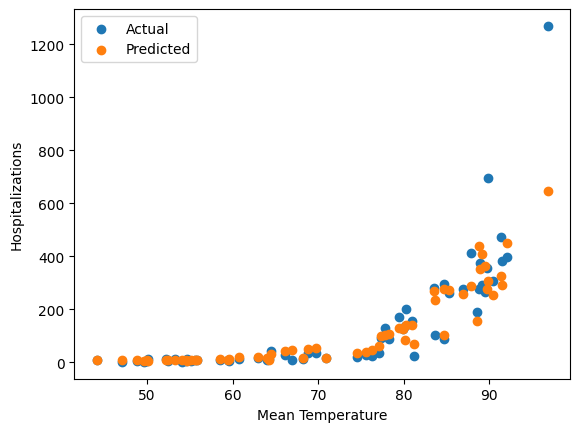

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

weekly_data_new['Start Date'] = pd.to_datetime(weekly_data_new['Start Date'], utc=True)

weekly_data_new.set_index('Start Date', inplace=True)

# Feature engineering: extract day of week, month, etc. if needed
weekly_data_new['Day'] = weekly_data_new.index.day
weekly_data_new['Month'] = weekly_data_new.index.month
weekly_data_new['DayOfWeek'] = weekly_data_new.index.dayofweek

# Define features and target variable
features = ['Mean', 'Day', 'Month', 'DayOfWeek']
target = 'Value'

X = weekly_data_new[features]
y = weekly_data_new[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot predicted vs. actual values
plt.scatter(X_test['Mean'], y_test, label='Actual')
plt.scatter(X_test['Mean'], predictions, label='Predicted')
plt.xlabel('Mean Temperature')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()


Very similar rates between predicted and actual number of hospitalizations by mean temperature!

In [ ]:
weekly_data_new = weekly_data1[['Start Date', 'Mean', 'Value']]
weekly_data_new.head()
weekly_data_new['Value'] = weekly_data_new['Value'].str.replace(',', '')
weekly_data_new['Value'] = weekly_data_new['Value'].astype(float)

<ipython-input-60-d6cfd97ff2e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Value'] = weekly_data_new['Value'].str.replace(',', '')
<ipython-input-60-d6cfd97ff2e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Value'] = weekly_data_new['Value'].astype(float)


In [ ]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

weekly_data_new['Start Date'] = pd.to_datetime(weekly_data_new['Start Date'], utc=True)

weekly_data_new.set_index('Start Date', inplace=True)

# Feature engineering: extract day of week, month, etc. if needed
weekly_data_new['Day'] = weekly_data_new.index.day
weekly_data_new['Month'] = weekly_data_new.index.month
weekly_data_new['DayOfWeek'] = weekly_data_new.index.dayofweek

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(weekly_data_new[['Mean', 'Value']])

# Prepare data for LSTM model
look_back = 10  # Number of previous time steps to use as input features

X, y = [], []

for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:(i + look_back), :])
    y.append(scaled_data[i + look_back, 1])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)


<ipython-input-61-39a6c78feff0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Start Date'] = pd.to_datetime(weekly_data_new['Start Date'], utc=True)
<ipython-input-61-39a6c78feff0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Day'] = weekly_data_new.index.day
<ipython-input-61-39a6c78feff0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Epoch 1/100
8/8 [==============================] - 5s 146ms/step - loss: 0.0206 - val_loss: 0.0330
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0135 - val_loss: 0.0439
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0138 - val_loss: 0.0375
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0118 - val_loss: 0.0326
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0117 - val_loss: 0.0327
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0110 - val_loss: 0.0343
Epoch 7/100
8/8 [==============================] - 0s 15ms/step - loss: 0.0108 - val_loss: 0.0317
Epoch 8/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0102 - val_loss: 0.0304
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0097 - val_loss: 0.0293
Epoch 10/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0091 - val_loss: 0.0274
Epoch 11/100
8/8 [

In [ ]:
# X_train= X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# #(X_test[:, -1, 0], y_pred[:, 0])
# y_pred = scaler.inverse_transform(np.concatenate((X_test, y_pred), axis=1)) #.reshape(-1, 1) #[:, 1]

In [ ]:
weekly_data_new = weekly_data1[['Start Date', 'Mean', 'Value']]
weekly_data_new.head()
weekly_data_new['Value'] = weekly_data_new['Value'].str.replace(',', '')
weekly_data_new['Value'] = weekly_data_new['Value'].astype(float)

<ipython-input-63-d6cfd97ff2e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Value'] = weekly_data_new['Value'].str.replace(',', '')
<ipython-input-63-d6cfd97ff2e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Value'] = weekly_data_new['Value'].astype(float)


In [ ]:
#y_pred

<ipython-input-65-49b57fe3d093>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Start Date'] = pd.to_datetime(weekly_data_new['Start Date'], utc=True)
<ipython-input-65-49b57fe3d093>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data_new['Day'] = weekly_data_new.index.day
<ipython-input-65-49b57fe3d093>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

Epoch 1/100
8/8 [==============================] - 6s 267ms/step - loss: 0.0190 - val_loss: 0.0336
Epoch 2/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0132 - val_loss: 0.0418
Epoch 3/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0127 - val_loss: 0.0355
Epoch 4/100
8/8 [==============================] - 0s 27ms/step - loss: 0.0120 - val_loss: 0.0310
Epoch 5/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0112 - val_loss: 0.0338
Epoch 6/100
8/8 [==============================] - 0s 25ms/step - loss: 0.0105 - val_loss: 0.0318
Epoch 7/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0098 - val_loss: 0.0286
Epoch 8/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0093 - val_loss: 0.0286
Epoch 9/100
8/8 [==============================] - 0s 29ms/step - loss: 0.0085 - val_loss: 0.0274
Epoch 10/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0074 - val_loss: 0.0234
Epoch 11/100
8/8 [

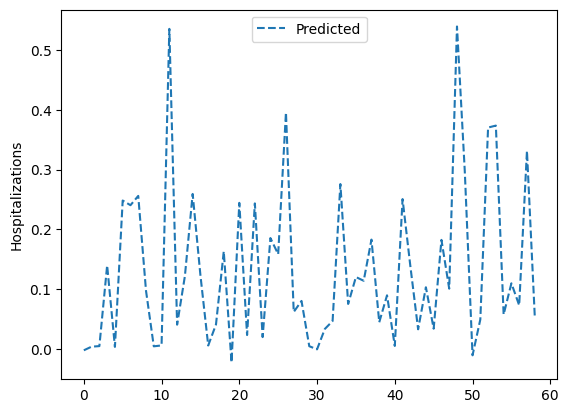

In [ ]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

weekly_data_new['Start Date'] = pd.to_datetime(weekly_data_new['Start Date'], utc=True)

weekly_data_new.set_index('Start Date', inplace=True)

# Feature engineering: extract day of week, month, etc. if needed
weekly_data_new['Day'] = weekly_data_new.index.day
weekly_data_new['Month'] = weekly_data_new.index.month
weekly_data_new['DayOfWeek'] = weekly_data_new.index.dayofweek

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(weekly_data_new[['Mean', 'Value']])

# Prepare data for LSTM model
look_back = 10  # Number of previous time steps to use as input features

X, y = [], []

for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:(i + look_back), :])
    y.append(scaled_data[i + look_back, 1])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 2)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

###y_pred = scaler.inverse_transform(y_pred)[:, [0]]

#predictions = scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))

# Inverse transform the predictions and actual values to original scale #y_pred[:, 0])
#y_pred = scaler.inverse_transform(np.concatenate((X_test[:, -1, 0], y_pred[:, 0]), axis=1))[:, 1]
#y_test_orig = scaler.inverse_transform(np.concatenate((X_test[:, -1, 0], y_test.reshape(-1, 1)), axis=1))[:, 1]

# Evaluate the model
# mse = mean_squared_error(y_test_orig, y_pred)
# print(f'Mean Squared Error: {mse}')

# Plot predicted vs. actual values
#plt.plot(df.index[-len(y_test_orig):], y_test_orig, label='Actual')
#df.index[-len(y_test_orig):],
plt.plot(y_pred, label='Predicted', linestyle='dashed')
##plt.xlabel('Date')
plt.ylabel('Hospitalizations')
plt.legend()
plt.show()


Above ^ Predicted Hospitalizations for the next 60 days (non-normalized).

Below: Error Metrics for prediction above.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.013940550568779245


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 0.06767894277559446
R-squared: 0.6317248529251134


Mean Squared Error: 0.013812798270002228,
Mean Absolute Error: 0.06840784616595558,
and R-squared: 0.6350997552569215

The MSE and MAE are both very close to 0!